### California city in the US housing price prediction model

We are going to develop a machine learning model to predict house prices in Boston using a linear regression model. We would first do some data visualization, followed by data feature engineering, and then select the best features based upon the correlation of the feautures. 

In [15]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [44]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

x = housing.data
y = housing.target

data = pd.DataFrame(x, columns = housing.feature_names)
data["StrikePrice"] = y
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,StrikePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [45]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [46]:
print(data.shape)

(20640, 9)


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   StrikePrice  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [48]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,StrikePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


EDA

In [41]:
data.isnull().sum()

MedInc          0
HouseAge        0
AveRooms        0
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
Strike Price    0
dtype: int64

In [ ]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

<AxesSubplot:xlabel='StrikePrice', ylabel='Count'>

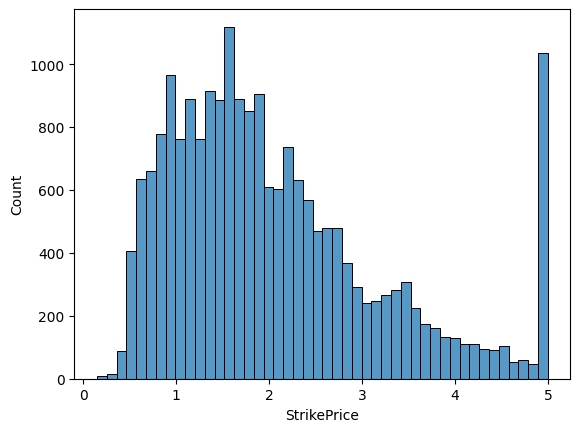

In [52]:
sns.histplot(data["StrikePrice"])

In [54]:
print("Skewness :%f" % data["StrikePrice"].skew())
print("Kurtosis :%f" % data["StrikePrice"].kurt())

Skewness :0.977763
Kurtosis :0.327870


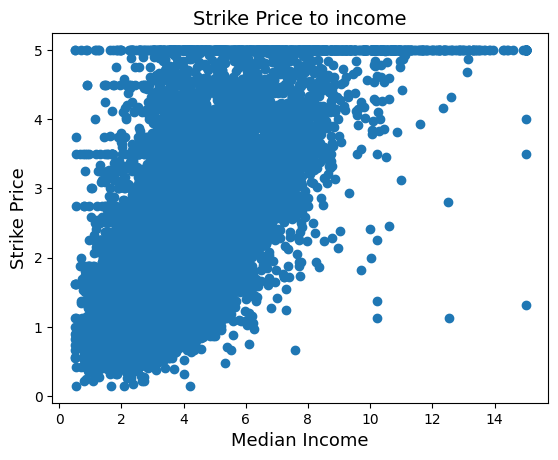

In [62]:
fig, ax = plt.subplots()
ax.scatter(x = data["MedInc"], y=data["StrikePrice"])
plt.ylabel("Strike Price", fontsize=13)
plt.xlabel("Median Income", fontsize=13)
plt.title("Strike Price to income", fontsize=14)
plt.show()


 mu=2.07 and sigma=1.15



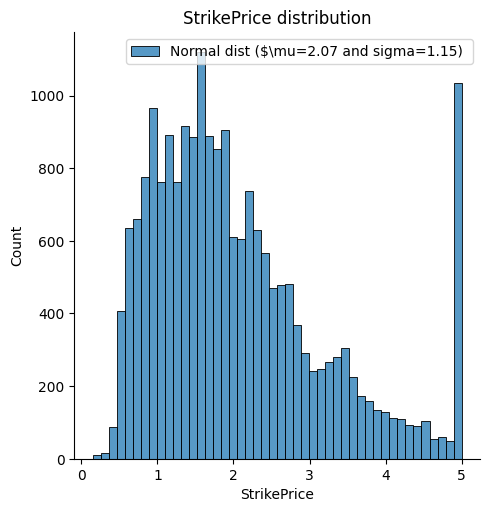

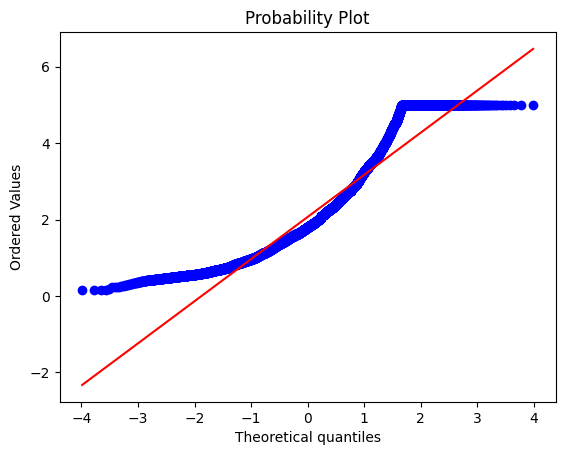

In [95]:
from scipy import stats
from scipy.stats import norm, skew

sns.displot(data["StrikePrice"]);
(mu, sigma) = norm.fit(data["StrikePrice"])
print('\n mu={:.2f} and sigma={:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist ($\mu={:.2f} and sigma={:.2f}) '.format(mu, sigma)],loc='best')
plt.title("StrikePrice distribution")

#Q-Q plot for normalize distribution visualization
fig = plt.figure()
res = stats.probplot(data['StrikePrice'], plot=plt)
plt.show()

sns.displot?


 mu=0.53 and sigma=0.10



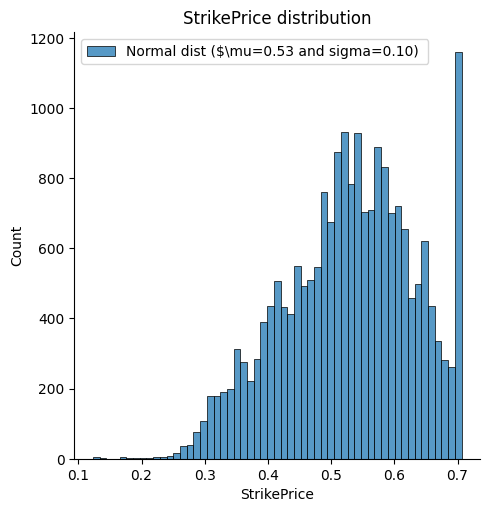

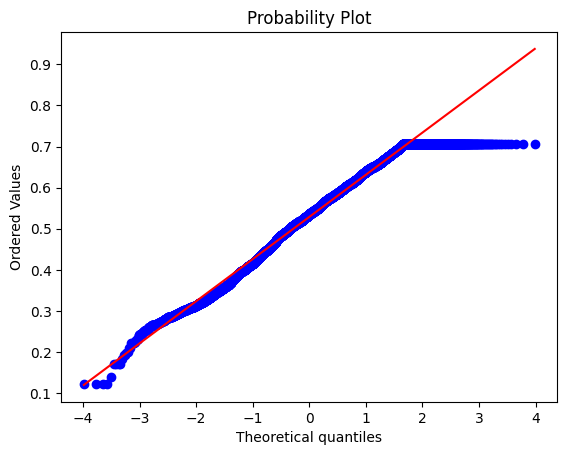

In [99]:
data['StrikePrice'] = np.log1p(data['StrikePrice'])

sns.displot(data["StrikePrice"]);

(mu, sigma) = norm.fit(data["StrikePrice"]);
print('\n mu={:.2f} and sigma={:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist ($\mu={:.2f} and sigma={:.2f}) '.format(mu, sigma)],loc='best')
plt.title("StrikePrice distribution")

fig = plt.figure()
res = stats.probplot(data['StrikePrice'], plot=plt)
plt.show()